<a href="https://colab.research.google.com/github/kevinpatelco/Stock_Prediction/blob/master/MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage
!pip install --upgrade scikit-learn

  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


# Data Source : Alpha Vantage ---- https://www.alphavantage.co/

In [2]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.layers import LSTM, SimpleRNN, GRU
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


#Data Processing

In [0]:
ts = TimeSeries(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#Add values to SPY_data Variable
SPY_data, SPY_meta_data = ts.get_daily(symbol='SPY', outputsize='full')


#Add values to SPX_data Variable
SPX_data, SPX_meta_data= ts.get_daily(symbol='SPX', outputsize='full')
# pprint(SPY_data)

SPX_weekly_data, SPX_weekly__meta_data = ts.get_weekly(symbol='SPX')



In [0]:
'''Simple Moving Average'''

ti = TechIndicators(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#SPX
spx_sma9 = ti.get_sma(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_sma13 = ti.get_sma(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_sma50 = ti.get_sma(symbol='SPX', interval='daily', time_period=50, series_type='close')

KeyError: ignored

In [0]:
#SPX SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_sma9[0].values)
plt.plot(spx_sma13[0].values)
plt.plot(spx_sma50[0].values)

plt.legend(['SPX close original data', 'SPX SMA 9', 'SPX SMA 13', 'SPX SMA 50'])

In [0]:
#SPY
spy_sma9 = ti.get_sma(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_sma13 = ti.get_sma(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_sma50 = ti.get_sma(symbol='SPY', interval='daily', time_period=50, series_type='close')

In [0]:
#SPY SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_sma9[0].values)
plt.plot(spy_sma13[0].values)
plt.plot(spy_sma50[0].values)

plt.legend(['SPY close original data', 'SPY SMA 9', 'SPY SMA 13', 'SPY SMA 50'])

By looking at the graphs we can see that, SMA 50 line would be the first one to show an uptrend or a downtrend as it shows the deviation before any other MA lines.

In [0]:
'''Exponential Moving Average'''

#SPX
spx_ema9 = ti.get_ema(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_ema13 = ti.get_ema(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_ema50 = ti.get_ema(symbol='SPX', interval='daily', time_period=50, series_type='close')

In [0]:
#SPX EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_ema9[0].values)
plt.plot(spx_ema13[0].values)
plt.plot(spx_ema50[0].values)

plt.legend(['SPX close original data', 'SPX EMA 9', 'SPX EMA 13', 'SPX EMA 50'])

In [0]:
#SPY
spy_ema9 = ti.get_ema(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_ema13 = ti.get_ema(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_ema50 = ti.get_ema(symbol='SPY', interval='daily', time_period=50, series_type='close')

In [0]:
#SPY EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_ema9[0].values)
plt.plot(spy_ema13[0].values)
plt.plot(spy_ema50[0].values)

plt.legend(['SPY close original data', 'SPY EMA 9', 'SPY EMA 13', 'SPY EMA 50'])

In [0]:
# df = SPX_data[['4. close']]
df = SPX_data
forecast_out = int(1)

# df['prediction'] = df[['4. close']].shift(-forecast_out)


In [0]:
X = np.array(df.drop(['prediction'],1))
X = preprocessing.scale(X)

In [0]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [0]:
y = np.array(df['prediction'])
y = y[:-forecast_out]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Regression Models


##Linear Regression

In [0]:
# Training - linear regression
reg = linear_model.LinearRegression()
# reg = linear_model.Ridge(alpha = 0.1)
reg.fit(X_train,y_train)

# Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

##Support Vector Regression

In [0]:
#Training - SVR
reg = svm.SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.1)
reg.fit(X_train, y_train)

#TESTING
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

##KNN Regressor

In [0]:
#Training - KNN
reg = neigh = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

##Random Forest Regressor

In [0]:
#Training - Random Forest Regressor
reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

In [0]:
X_train.shape

#Neural Network Regression

##RNN - LSTM

In [0]:
# df = SPX_data[['4. close']]
df = SPX_data
# forecast_out = int(1)

# df['prediction'] = df[['4. close']].shift(-forecast_out)
# df
df_weekly = SPX_weekly_data

In [5]:
SPX_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2000-01-03,1469.25,1478.00,1438.3600,1455.22,9.318000e+08
2000-01-04,1455.22,1455.22,1397.4301,1399.42,1.009000e+09
2000-01-05,1399.42,1413.27,1377.6801,1402.11,1.085500e+09
2000-01-06,1402.11,1411.90,1392.1000,1403.45,1.092300e+09
2000-01-07,1403.45,1441.47,1400.7300,1441.47,1.225200e+09


In [0]:
SPX_weekly_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2000-01-14,1441.47,1473.00,1427.08,1465.15,5.169700e+09
2000-01-21,1465.15,1465.71,1438.54,1441.36,4.455000e+09
2000-01-28,1441.36,1454.09,1356.20,1360.16,5.532100e+09
2000-02-04,1360.16,1435.91,1350.14,1424.37,5.205000e+09
2000-02-11,1424.37,1444.55,1378.89,1387.12,5.100800e+09


In [6]:
scl = preprocessing.MinMaxScaler()

#Scale the daily data
df = df.values #["4. close"]
df = df.reshape(df.shape[0],5)
df = scl.fit_transform(df)
df

#scale the weekly data
# df_weekly = df_weekly.values
# df_weekly = df_weekly.reshape(df_weekly.shape[0], 5)
# df_weekly = scl.fit_transform(df_weekly)
# df_weekly

array([[0.34993444, 0.34855544, 0.34135431, 0.34498816, 0.05186682],
       [0.34371955, 0.33841134, 0.3232463 , 0.32026672, 0.05882167],
       [0.31900172, 0.31973069, 0.3145086 , 0.32145849, 0.06571347],
       ...,
       [0.98814164, 0.99795168, 0.99177988, 1.        , 0.29539754],
       [0.9987774 , 0.99818323, 0.999531  , 0.99715132, 0.27863472],
       [0.99655811, 0.99652224, 0.99368673, 0.99793992, 0.06162896]])

In [7]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    feature = data[:, [3]]
    data = data[:, [0,1,2,4]]
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),:])
        Y.append(feature[(i+lb),0])
    return np.array(X),np.array(Y)
  
# X, y = processData(df, 30)
X,y = processData(df,7)

X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3880, 7, 4)
(970, 7, 4)
(3880,)
(970,)


In [0]:
y_train.shape
# y_test.shape

(3876,)

In [8]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],4))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],4))

#Build the model
model = Sequential()

# model.add(LSTM(units = 256, input_shape=(7,4), return_sequences=True))

# model.add(LSTM(units = 128, input_shape=(7,4)))

model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

model.add(LSTM(units = 100, input_shape=(7,4)))

# layer1 = LSTM(units = 1024, input_shape=(7,5))
# output = layer1(input)

# model.add()

# model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100 ,validation_data=(X_test,y_test),shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3880 samples, validate on 970 samples
Epoch 1/100
3880/3880 [==============================] - 8s 2ms/step - loss: 0.0078 - val_loss: 0.0275
Epoch 2/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0060 - val_loss: 0.0288
Epoch 3/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0069 - val_loss: 0.0420
Epoch 4/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0082 - val_loss: 0.0147
Epoch 5/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0073 - val_loss: 0.0321
Epoch 6/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0100 - val_loss: 0.0526
Epoch 7/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0135 - val_loss: 0.0148
Epoch 8/100
3880/3880 [==============================] - 5s 1ms/step - loss: 0.0188 - val_loss: 0.0392
Epoch 9/1

In [0]:
# model.evaluate(X_train, y_train, batch_size=1)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 100)            42000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 285,751
Trainable params: 285,751
Non-trainable params: 0
_________________________________________________________________


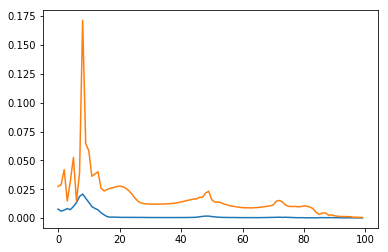

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

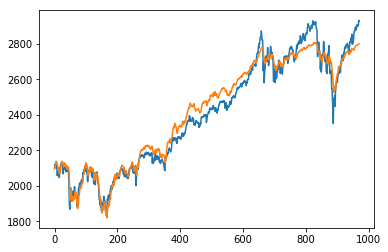

In [10]:
Xt = model.predict(X_test)
Xt = Xt.ravel()
testPredict_extended = np.zeros((len(Xt),5))
testPredict_extended[:, 3] = Xt
testPredict = scl.inverse_transform(testPredict_extended)[:, 3]

y_test_extended = np.zeros((len(y_test),5))
y_test_extended[:, 3] = y_test 
y_test = scl.inverse_transform(y_test_extended)[:, 3]

plt.plot(y_test)
plt.plot(testPredict)


# y_test
# scl.inverse_transform(y_test)[3]
# scl.inverse_transform(Xt)

In [0]:
testPredict